In [1]:
#print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("D:\Module3_RP\Session1\cheese.csv", sep = ',')

In [9]:
df.head()
df.shape

,Unnamed: 0,RETAILER,VOLUME,DISP,PRICE
0,1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
1,2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
2,3,LOS ANGELES - VONS,17302,0.102000,2.711421
3,4,CHICAGO - DOMINICK,13561,0.027591,2.651206
4,5,CHICAGO - JEWEL,42774,0.090613,1.986674


(5555, 5)

In [11]:
#Aggregate information at the store level
df_pivot=pd.pivot_table(df,values=['VOLUME','DISP','PRICE'],index='RETAILER',aggfunc=np.median)
df_pivot.head()
df_pivot.shape

,DISP,PRICE,VOLUME
RETAILER,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0
ATLANTA - KROGER CO,0.030872,2.701700,4455.0
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0


(88, 3)

In [16]:
#scale all values between0 and 1
scld=MinMaxScaler(feature_range=(0,1))





In [17]:
arr_scld=scld.fit_transform(df_pivot)


In [18]:
arr_scld

array([[0.        , 0.31890809, 0.01717571],
       [0.073857  , 0.25029643, 0.28580668],
       [0.        , 0.24635524, 0.1703198 ],
       [0.        , 0.70538766, 0.27732663],
       [0.        , 0.79096937, 0.24103485],
       [0.        , 0.72229798, 0.04703557],
       [0.48325359, 0.10874621, 0.70140137],
       [0.        , 0.11776111, 0.10567733],
       [0.06437654, 0.08032251, 0.33977722],
       [0.        , 0.14304636, 0.15795904],
       [0.        , 0.42798175, 0.01487603],
       [0.        , 0.18108497, 0.14423284],
       [0.16686603, 0.46144067, 0.1309019 ],
       [0.36682616, 0.5178441 , 0.15950413],
       [0.42344498, 0.11767846, 0.09256198],
       [0.0579686 , 0.17433236, 0.26539705],
       [0.        , 0.15815875, 0.0878189 ],
       [0.42429865, 0.09545972, 0.17161337],
       [0.46172249, 0.4426098 , 0.43564499],
       [0.05350278, 0.43041608, 1.        ],
       [0.        , 0.24299807, 0.21674452],
       [0.26555024, 0.23002516, 0.4108516 ],
       [0.

In [19]:
df_scld=pd.DataFrame(arr_scld,columns=df_pivot.columns)


In [20]:
df_scld.head()


,DISP,PRICE,VOLUME
0,0.000000,0.318908,0.017176
1,0.073857,0.250296,0.285807
2,0.000000,0.246355,0.170320
3,0.000000,0.705388,0.277327
4,0.000000,0.790969,0.241035


In [21]:
df_scld.describe()
df_scld.shape

,DISP,PRICE,VOLUME
count,88.000000,88.000000,88.000000
mean,0.201006,0.337239,0.252149
std,0.234245,0.214843,0.204063
min,0.000000,0.000000,0.000000
25%,0.000000,0.173638,0.105704
50%,0.099057,0.254668,0.217822
75%,0.343301,0.456079,0.326105
max,1.000000,1.000000,1.000000


(88, 3)

In [25]:
#lets build clusters
from sklearn.cluster import KMeans
num_of_clusters= range(2,10)
error=[]

for num_clusters in num_of_clusters:
    cluster=KMeans(num_clusters)
    cluster.fit(df_scld)
    error.append(cluster.inertia_/100)
    
df=pd.DataFrame({"Cluster_Numbers":num_of_clusters, "Error_Term":error})
df

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,Cluster_Numbers,Error_Term
0,2,0.087082
1,3,0.063298
2,4,0.044102
3,5,0.035960
4,6,0.030617
5,7,0.026417
6,8,0.022785
7,9,0.020057


<Figure size 1080x720 with 0 Axes>

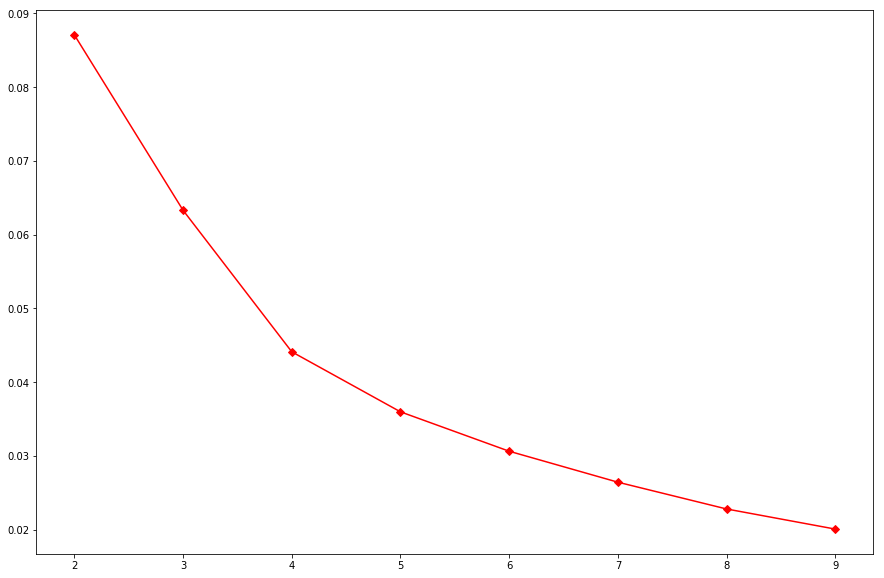

In [26]:
#Find out the right number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers,df.Error_Term,marker="D",color='red')
plt.xlabel=('Number of Clusters')
plt.ylabel=('SSE')
plt.title=('Find the optimal number of clusters')
plt.show()

In [29]:
# Build with 4 Clusters
cluster=KMeans(4)
cluster.fit(df_scld)
cluster.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([1, 1, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 2, 3, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 3, 0, 2, 2, 1, 1, 1, 3, 2, 0,
       1, 1, 3, 3, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 3, 2, 2, 0, 2, 1, 2, 0, 3, 0, 1, 2, 1, 1, 1, 0])

In [30]:
df_pivot['cluster']=cluster.labels_

In [32]:
df_pivot.head()

,DISP,PRICE,VOLUME,cluster
RETAILER,,,,
"ALBANY,NY - PRICE CHOPPER",0.000000,2.864821,717.0,1
ATLANTA - KROGER CO,0.030872,2.701700,4455.0,1
ATLANTA - WINN DIXIE,0.000000,2.692330,2848.0,1
BALTI/WASH - GIANT FOOD INC,0.000000,3.783658,4337.0,0
BALTI/WASH - SAFEWAY,0.000000,3.987125,3832.0,0


In [33]:
df_pivot.tail()

,DISP,PRICE,VOLUME,cluster
RETAILER,,,,
SYRACUSE - WEGMANS,0.227423,3.459383,807.0,2
TAMPA/ST. PETE - KASH N KARRY,0.000000,2.877614,3797.0,1
TAMPA/ST. PETE - PUBLIX,0.036500,2.769338,5021.0,1
TAMPA/ST. PETE - WINN DIXIE,0.014416,2.599700,5169.0,1
WICHITA - DILLON COMPANIES,0.000000,3.378888,1187.5,0


In [34]:
df_pivot.shape

(88, 4)

In [36]:
clust_profile=pd.pivot_table(df_pivot,values=['VOLUME','DISP','PRICE'],index='cluster',aggfunc=np.mean)

In [37]:
np.round(clust_profile,2)

,DISP,PRICE,VOLUME
cluster,,,
0,0.05,3.54,2987.54
1,0.03,2.61,3417.47
2,0.24,2.77,3463.58
3,0.08,2.75,10864.50


In [38]:
df_pivot.groupby("cluster").size()

cluster
0    24
1    38
2    18
3     8
dtype: int64